# Compresión de imágenes

In [1]:
# Paquetes con los que vamos a trabajar hoy
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

## La imagen de la clase práctica

Graficamos la matriz $A$ en blanco y negro.

Tomamos el valor 1 como blanco y el 0 como negro.

In [3]:
A= np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,0,0,0,0,0,0,1,1],
    [1,1,0,0,0,0,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1],
])
print(np.shape(A))

(12, 10)


¿Cuántas entradas se guardan de la matriz $A$?

In [88]:
#Completar

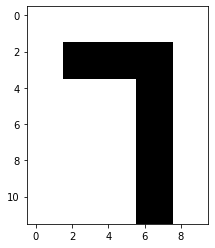

In [4]:
plt.imshow(A, cmap = "gray")

¿Cuál es el rango máximo que puede tener $A$?

¿Cuántas filas distintas tiene $A$? ¿Cuántas columnas distintas tiene $A$?

¿Cuál es la cantidad máxima de valores singulares no nulos que puede tener $A$?

Consideremos $A= U \Sigma V^t$ una descomposición en valores singulares.
A partir de estas respuestas, podemos darnos una idea estimada de cuántas columnas de $U$ y $V$ podemos descartar sin perder información.

### Valores singulares

In [5]:
# Calculamos la descomposición en valores singulares
[U, S, Vh] = np.linalg.svd(A)
print("Tamaño de U = ", np.shape(U))
print("Tamaño de S = ", np.shape(S))
print("Tamaño de Vh = ", np.shape(Vh))

Tamaño de U =  (12, 12)
Tamaño de S =  (10,)
Tamaño de Vh =  (10, 10)


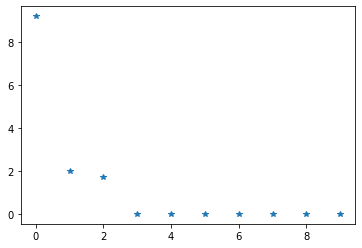

In [6]:
# Graficamos los valores singulares
plt.plot(S, '*')

In [7]:
# Observamos que hay 3 valores singulares no nulos. Lo verificamos.
print(S)

[9.21888296e+000 2.00000000e+000 1.73556819e+000 4.99038658e-016
 2.85076104e-018 1.91669207e-034 4.40285591e-051 9.81531943e-068
 1.96491990e-087 2.05710055e-116]


Para evitar los errores numéricos, definimos una función que elimine de $\Sigma$ los valores singulares pequeños, dejando solo los primeros $k$ valores.

In [8]:
# Función para eliminar de S los valores singulares a partir del k+1
# Toma como parámetro también A para saber el tamaño de Sigma.
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

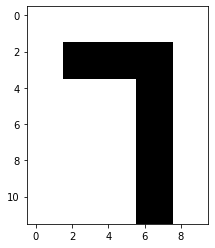

In [21]:
# Aplicamos la función para construir la matriz Sigma con 3 valores singulares no nulos
k = 3
S_trunc = truncateSigma(A, S, k)
A_3 = U @ S_trunc @ Vh
plt.imshow(A_3, cmap='gray')

### Descomposición en valores singulares reducida

Cuando $\Sigma$ tiene solo $k$ valores no nulos en la diagonal, podemos quedarnos con las primeras $k$ columnas de $U$ y las primeras $k$ columnas de $V$ (es decir, las primeras $k$ filas de $V^t$).

Obtenemos una descomposición que utiliza menos datos
$$
A = \tilde U \tilde \Sigma \tilde V^{*}
$$
con $\tilde U \in \mathbb{K}^{m \times k}$, $\tilde \Sigma \in \mathbb{K}^{k \times k}$, $\tilde V^{*} \in \mathbb{K}^{k \times n}$.

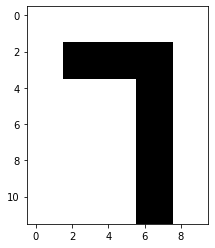

In [22]:
# Podemos construir A utilizando solo las primeras 3 columnas de U y 3 columnas de V (3 filas de Vh)
# y tomando solo la submatriz de 3x3 de S

k = 3
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

¿Cuántas columnas de $U$ y $V$ pudimos descartar sin que se modificara la imagen?

In [29]:
Ur = U[:,:k]
Vr = Vh[:k,]
Sr = S_trunc[:k,:k]
print("Dimensiones de la matriz U reducida:", np.shape(Ur))
print("Dimensiones de la matriz V reducida:",np.shape(Vr))
print("Dimensiones de la matriz Sigma reducida:",np.shape(Sr))


Dimensiones de la matriz U reducida: (12, 3)
Dimensiones de la matriz V reducida: (3, 10)
Dimensiones de la matriz Sigma reducida: (3, 3)


A partir de estos datos, calcular el porcentaje de compresión:

$$
\frac{\text{cantidad de entradas guardadas sin comprimir}}{\text{cantidad de entradas guardadas al comprimir}} \times 100
$$

¿Qué sucede con la imagen si en lugar de guardar tres valores singulares no nulos, conservamos solamente los primeros dos? 


In [85]:
#Completar

## Compresión de la imagen de un árbol

Vamos a aplicar la misma estrategia para comprimir la imagen de un árbol con el agregado de convertir también a 0 los valores singulares pequeños. Si bien permite descartar más información, esto se traduce en una pérdida de calidad de la imagen.

(1082, 2000, 3)


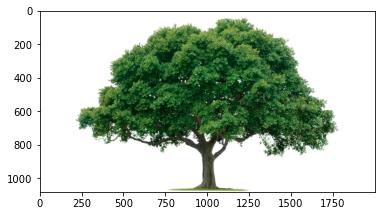

In [32]:
# Leemos el archivo
img = io.imread('tree2.jpg')
print(img.shape)

plt.imshow(img)

(1082, 2000)


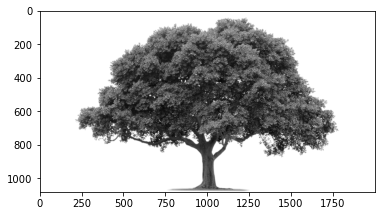

In [33]:
# Lo convertimos a tonos de gris para simplificar la aplicación
imgGray = color.rgb2gray(img)
print(imgGray.shape)

plt.imshow(imgGray, cmap='gray')


Calculemos una descomposición SVD de $A$ y grafiquemos los valores singulares.

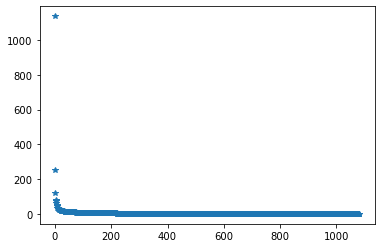

In [44]:
A = imgGray
[U, S, Vh] = np.linalg.svd(A)
plt.plot(S, '*')

Es difícil diferenciar a partir de qué índice los valores singulares se vuelven pequeños. Para eso, calculamos su logaritmo.

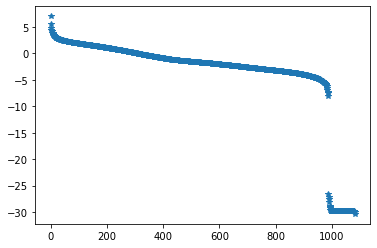

In [35]:
# Graficamos los logaritmos para ver mejor los saltos
plt.plot(np.log(S), '*')

In [36]:
# Imprimimos los valores singulares a partir del 900
for i in range(900,1082):
    print(i, np.log(S[i]), S[i])


900 -4.0207084690443065 0.017940250324077246
901 -4.039868295362911 0.01759979023697213
902 -4.046576132440281 0.017482128779591714
903 -4.057869756019174 0.01728580289979939
904 -4.062950905717298 0.017198193913292168
905 -4.0735133017270995 0.017017495761197706
906 -4.08340978086426 0.016849913076457883
907 -4.086911297532604 0.016791015999684748
908 -4.092347300641538 0.016699987623933352
909 -4.122400469831061 0.01620556674020546
910 -4.127450197800085 0.01612393930820331
911 -4.14316320036698 0.01587256391158623
912 -4.157418076329291 0.015647907510584636
913 -4.158617449387908 0.015629151082118625
914 -4.186063370948479 0.01520602769360927
915 -4.204448974865972 0.014929010062816897
916 -4.215633210843077 0.01476297073366751
917 -4.219384516448668 0.014707694063462975
918 -4.233283771214293 0.014504682201752356
919 -4.263145534019178 0.0140779500200496
920 -4.268600288810879 0.014001367314549255
921 -4.274247564836781 0.013922520572787644
922 -4.290394939178236 0.0136995137541157

¿A partir de qué índice los valores singulares se vuelven muy pequeños?

Podemos eliminar los valores singulares a partir de $i= 987$ sin perder mucha información. Vamos a crear una nueva matriz $\Sigma'$ reemplazando los valores singulares más pequeños en la diagonal de $\Sigma$ por $0$.

In [43]:
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

S_trunc = #completar
print("Tamaño de la matriz Sigma truncada:", #completar)

Tamaño de la matriz Sigma truncada: (1082, 2000)


Construímos una nueva imagen utilizando $\Sigma'$ en la factorización en valores singulares de $A$:
$$
A' = U \Sigma' V^t
$$

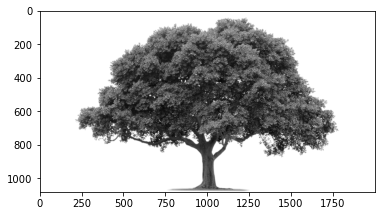

In [38]:
# Reconstruimos la imagen utilizando la nueva S
A_trunc = #completar
plt.imshow(A_trunc, cmap='gray')

Distancia entre matrices: 7.893808890993557e-12
Error relativo: 6.63962833099815e-15


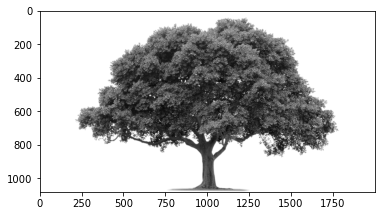

In [83]:
# Comparamos con la version original
plt.imshow(imgGray, cmap='gray')
print("Distancia entre matrices:", np.linalg.norm(A_trunc-A))
print("Error relativo:", np.linalg.norm(A_trunc-A)/np.linalg.norm(A))

Al reemplazar $\Sigma$ por $\Sigma'$, solo nos deshicimos de los valores singulares más pequeños pero seguimos guardando la misma cantidad de información. 

Recurrimos a la descomposición en valores singulares reducida. Nos quedamos con las primeras $987$ columnas de $U$ y $V$ respectivamente y nos quedamos con la submatriz diagonal de $987 \times 987$ de $\Sigma'$.

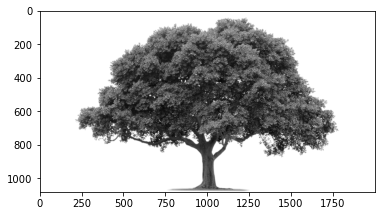

In [40]:
# Podemos construir A utilizando solo las primeras k columnas de U y k columnas de V (k filas de Vh)
# y tomando solo la submatriz de 987x987 de Sigma

k = 987
A_zip = #completar
plt.imshow(A_zip, cmap='gray')

Nuestra nueva imagen es entonces $\bar{A} = \bar{U} \bar{\Sigma'} \bar{V^t}$, donde reducimos las dimensiones de $U$, $V^t$ y $\Sigma'$. Para comprobar que no se perdió información, calculamos
$$
\|A' - \bar{A}\|_2 = \|{U \Sigma' V^t - \bar{U} \bar{\Sigma'} \bar{V^t}}\|_2 .
$$

In [87]:
#Completar

¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición en valores singulares reducida? Calcular el porcentaje de compresión.

In [86]:
#Completar

Probemos eliminando una mayor cantidad de valores singulares. Nos quedamos con los primeros doscientos.

Distancia entre matrices:  21.146976737010945
Error relativo: 0.01778711238097179


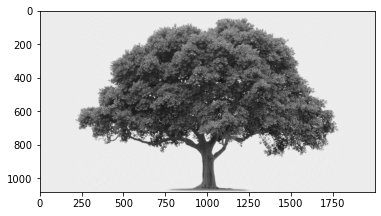

In [84]:
k = #completar
A200 = #completar
plt.imshow(A200, cmap='gray')
print("Distancia entre matrices: ", #completar)
print("Error relativo:", #completar)

Notamos que el color blanco se volvió gris.

Pueden repetir estos pasos para el ejemplo `quijote.jpg` de la práctica, y así resolver los ejercicios 11 a 15.